<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/2_3_training_slope_and_bias_v3_Answered_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Linear regression 1D: Training Two Parameter</h1>


<h2>Objective</h2><ul><li> How to train the model and visualize the loss results.</li></ul>


<h2>Table of Contents</h2>
<p>In this lab, you will train a model with PyTorch by using the data that we created. The model will have the slope and bias. And we will review how to make a prediction in several different ways by using PyTorch.</p>

<ul>
    <li><a href="#Make-Some-Data">Make Some Data</a></li>
    <li><a href="#Create-the-Model-and-Cost-Function-(Total-Loss)">Create the Model and Cost Function (Total Loss) </a></li>
    <li><a href="#Train-the-Model">Train the Model </a></li>
</ul>
<p>Estimated Time Needed: <strong>20 min</strong></ul>

<hr>


<h2>Preparation</h2>


We'll need the following libraries:  


In [1]:
# These are the libraries we are going to use in the lab.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [2]:
# The class for plot the diagram

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<Figure size 640x480 with 0 Axes>

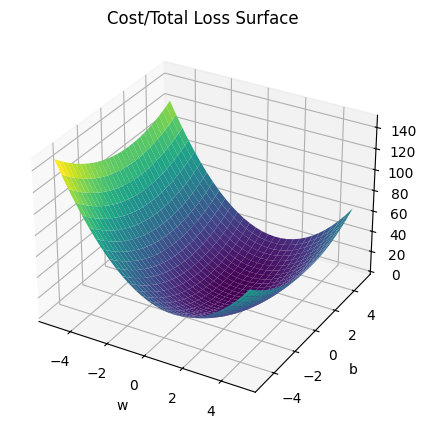

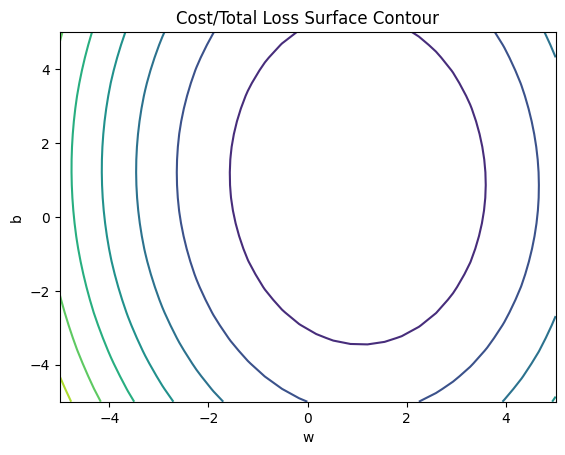

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Generate data
X = torch.arange(-3, 3, 0.1).view(-1, 1)
Y = 1 * X - 1 + 0.1 * torch.randn(X.size())

# Define and trigger the plotting class
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples=30, go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            ax = plt.axes(projection='3d')
            ax.plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()

            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

# ✅ Instantiate to generate plots
plotter = plot_error_surfaces(w_range=5, b_range=5, X=X, Y=Y)


<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


Import PyTorch:


In [4]:
# Import PyTorch library

import torch

Start with generating values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate.


In [5]:
# Create f(X) with a slope of 1 and a bias of -1

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1

Now, add some noise to the data:


In [6]:
# Add noise

Y = f + 0.1 * torch.randn(X.size())

Plot the line and <code>Y</code> with noise:


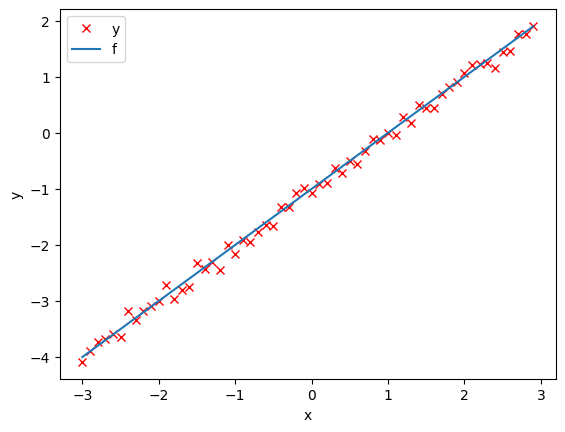

In [7]:
# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>


Define the <code>forward</code> function:


In [8]:
# Define the forward function

def forward(x):
    return w * x + b

Define the cost or criterion function (MSE):


In [9]:
# Define the MSE Loss function

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


<Figure size 640x480 with 0 Axes>

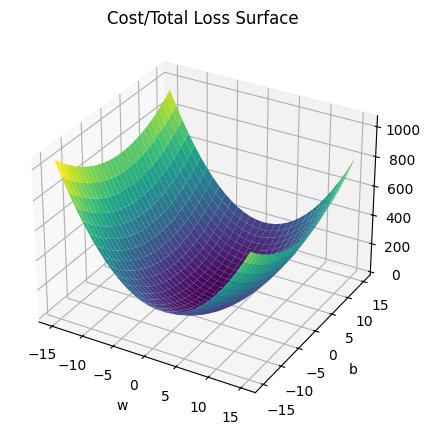

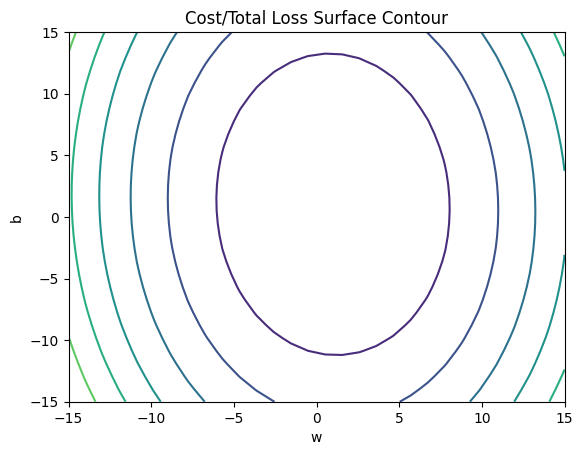

In [10]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

<!--Empty Space for separating topics-->


<h2 id="Train">Train the Model</h2>


Create model parameters <code>w</code>, <code>b</code> by setting the argument <code>requires_grad</code> to True because we must learn it using the data.


In [11]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Set the learning rate to 0.1 and create an empty list <code>LOSS</code> for storing the loss for each iteration.


In [12]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

Define <code>train_model</code> function for train the model.


In [13]:
# The function for training the model

def train_model(iter):

    # Loop
    for epoch in range(iter):

        # make a prediction
        Yhat = forward(X)

        # calculate the loss
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()

        # store the loss in the list LOSS
        LOSS.append(loss)

        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()

        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data

        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

Run 15 iterations of gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space


<Figure size 640x480 with 0 Axes>

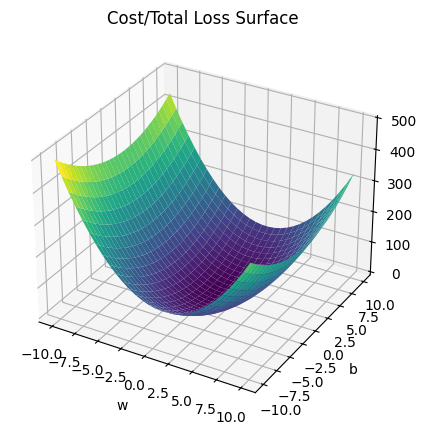

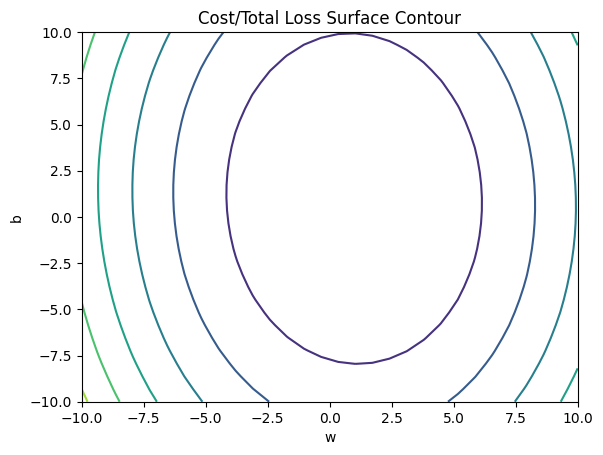

Epoch 1, w = -9.3443, b = -4.9309, loss = 374.1194
Epoch 2, w = -8.7279, b = -4.8624, loss = 331.9400
Epoch 3, w = -8.1485, b = -4.7948, loss = 294.6193
Epoch 4, w = -7.6037, b = -4.7279, loss = 261.5933
Epoch 5, w = -7.0916, b = -4.6618, loss = 232.3638
Epoch 6, w = -6.6102, b = -4.5965, loss = 206.4904
Epoch 7, w = -6.1576, b = -4.5320, loss = 183.5842
Epoch 8, w = -5.7322, b = -4.4684, loss = 163.3012
Epoch 9, w = -5.3322, b = -4.4056, loss = 145.3377
Epoch 10, w = -4.9561, b = -4.3437, loss = 129.4251
Epoch 11, w = -4.6026, b = -4.2826, loss = 115.3262
Epoch 12, w = -4.2702, b = -4.2224, loss = 102.8313
Epoch 13, w = -3.9577, b = -4.1631, loss = 91.7549
Epoch 14, w = -3.6639, b = -4.1046, loss = 81.9332
Epoch 15, w = -3.3877, b = -4.0470, loss = 73.2216


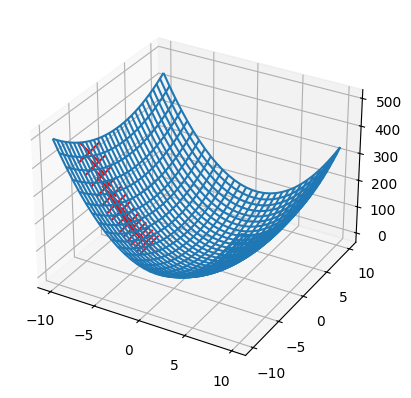

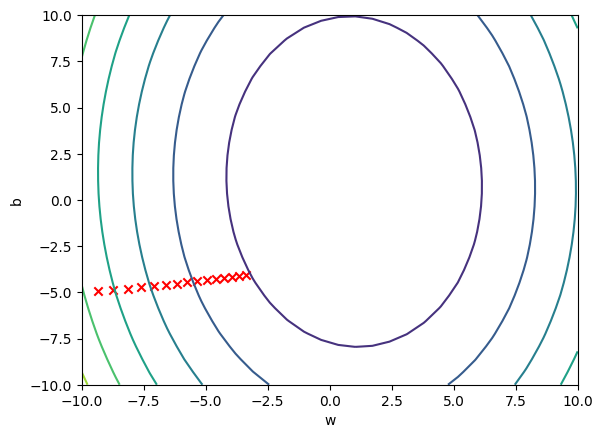

In [16]:
# Train the model with 15 iterations

import torch
import matplotlib.pyplot as plt
import numpy as np

# Create input data
X = torch.arange(-3, 3, 0.1).view(-1, 1)
Y = 1 * X - 1 + 0.1 * torch.randn(X.size())

# Initialize model parameters
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-5.0, requires_grad=True)

# Define forward function
def forward(x):
    return w * x + b

# Loss function
criterion = torch.nn.MSELoss()

# Optimizer
optimizer = torch.optim.SGD([w, b], lr=0.01)

# Plotting class
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples=30, go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.detach().numpy()
        self.x = X.detach().numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            ax = plt.axes(projection='3d')
            ax.plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    def set_para_loss(self, W, B, loss):
        self.n += 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

# Create plot tracker
plotter = plot_error_surfaces(w_range=10, b_range=10, X=X, Y=Y)

# Define training loop
def train_model(iterations):
    for epoch in range(iterations):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Log and plot updates
        plotter.set_para_loss(w.item(), b.item(), loss.item())
        print(f"Epoch {epoch+1}, w = {w.item():.4f}, b = {b.item():.4f}, loss = {loss.item():.4f}")

# Train the model for 15 iterations
train_model(15)

# Optional: Final visualization of parameter path
plotter.final_plot()


Plot total loss/cost surface with loss values for different parameters in red:


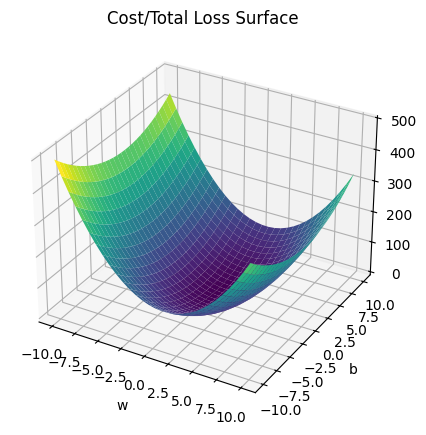

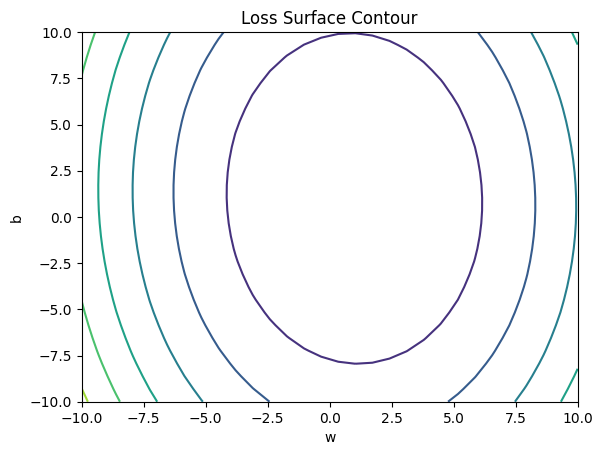

Epoch 1: w=-9.3437, b=-4.9310, loss=374.7155
Epoch 2: w=-8.7268, b=-4.8627, loss=332.4617
Epoch 3: w=-8.1468, b=-4.7952, loss=295.0753
Epoch 4: w=-7.6015, b=-4.7285, loss=261.9915
Epoch 5: w=-7.0890, b=-4.6625, loss=232.7112
Epoch 6: w=-6.6071, b=-4.5974, loss=206.7931
Epoch 7: w=-6.1541, b=-4.5330, loss=183.8475
Epoch 8: w=-5.7282, b=-4.4695, loss=163.5299
Epoch 9: w=-5.3279, b=-4.4069, loss=145.5359
Epoch 10: w=-4.9515, b=-4.3451, loss=129.5965
Epoch 11: w=-4.5976, b=-4.2841, loss=115.4741
Epoch 12: w=-4.2649, b=-4.2241, loss=102.9585
Epoch 13: w=-3.9522, b=-4.1649, loss=91.8639
Epoch 14: w=-3.6581, b=-4.1065, loss=82.0265
Epoch 15: w=-3.3817, b=-4.0491, loss=73.3009


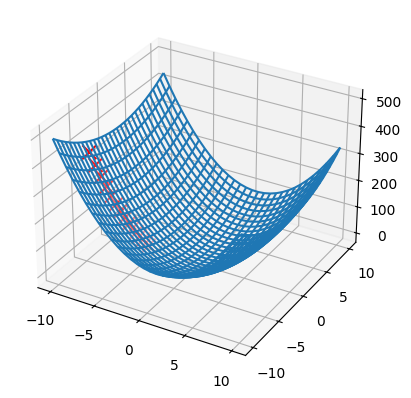

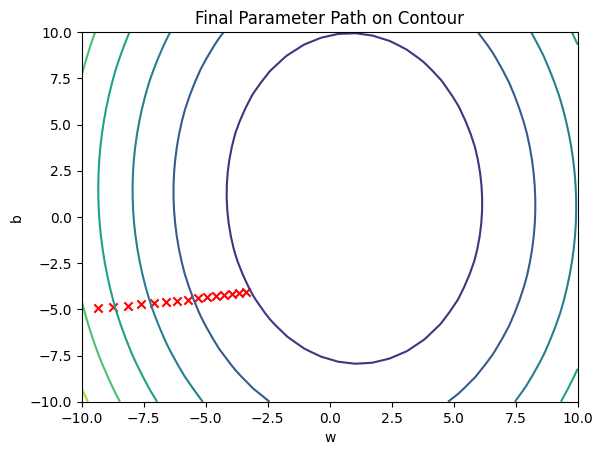

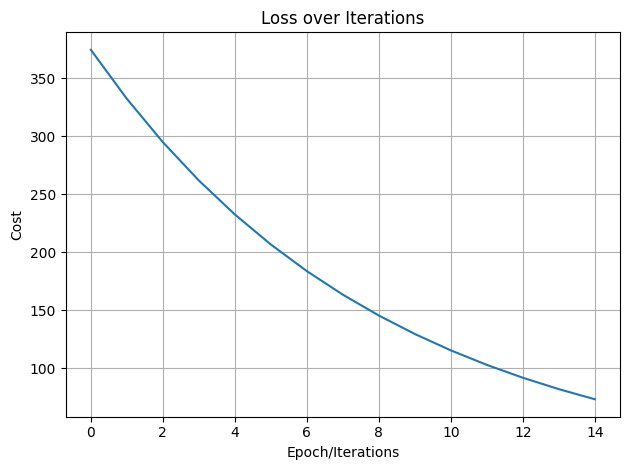

In [18]:
# Plot out the Loss Result
import torch
import matplotlib.pyplot as plt
import numpy as np

# Generate training data
X = torch.arange(-3, 3, 0.1).view(-1, 1)
Y = 1 * X - 1 + 0.1 * torch.randn(X.size())

# Initialize parameters
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-5.0, requires_grad=True)

# Define model
def forward(x): return w * x + b

# Loss function
criterion = torch.nn.MSELoss()

# Optimizer
optimizer = torch.optim.SGD([w, b], lr=0.01)

# Define plotting class
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples=30, go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.detach().numpy()
        self.x = X.detach().numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go:
            plt.figure(figsize=(7.5, 5))
            ax = plt.axes(projection='3d')
            ax.plot_surface(self.w, self.b, self.Z, cmap='viridis', edgecolor='none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()

            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    def set_para_loss(self, W, B, loss):
        self.n += 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=100)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.title('Final Parameter Path on Contour')
        plt.show()

# Create surface object
get_surface = plot_error_surfaces(10, 10, X, Y)

# Training loop
LOSS5 = []
def train_model(iterations):
    for epoch in range(iterations):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        get_surface.set_para_loss(w.item(), b.item(), loss.item())
        LOSS5.append(loss)
        print(f"Epoch {epoch+1}: w={w.item():.4f}, b={b.item():.4f}, loss={loss.item():.4f}")

# Train the model
train_model(15)

# Plot final surface path
get_surface.final_plot()

# Plot loss over iterations
LOSS_plot = [l.detach().item() for l in LOSS5]
plt.plot(LOSS_plot)
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.title("Loss over Iterations")
plt.grid(True)
plt.tight_layout()
plt.show()


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Experiment using s learning rates 0.2 and width the following parameters. Run 15 iterations.


In [ ]:
# Practice: train and plot the result with lr = 0.2 and the following parameters

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []

Epoch 1: w = 4.0362, b = -6.7221, loss = 835.3851
Epoch 2: w = 0.2818, b = -4.3746, loss = 62.0162
Epoch 3: w = 1.0821, b = -3.0411, loss = 12.6875
Epoch 4: w = 0.9482, b = -2.2251, loss = 4.1888
Epoch 5: w = 0.9914, b = -1.7381, loss = 1.5002
Epoch 6: w = 0.9925, b = -1.4451, loss = 0.5458
Epoch 7: w = 0.9981, b = -1.2693, loss = 0.2023
Epoch 8: w = 1.0005, b = -1.1636, loss = 0.0785
Epoch 9: w = 1.0021, b = -1.1002, loss = 0.0338
Epoch 10: w = 1.0031, b = -1.0621, loss = 0.0177
Epoch 11: w = 1.0037, b = -1.0393, loss = 0.0119
Epoch 12: w = 1.0040, b = -1.0255, loss = 0.0098
Epoch 13: w = 1.0042, b = -1.0173, loss = 0.0091
Epoch 14: w = 1.0043, b = -1.0123, loss = 0.0088
Epoch 15: w = 1.0044, b = -1.0094, loss = 0.0087


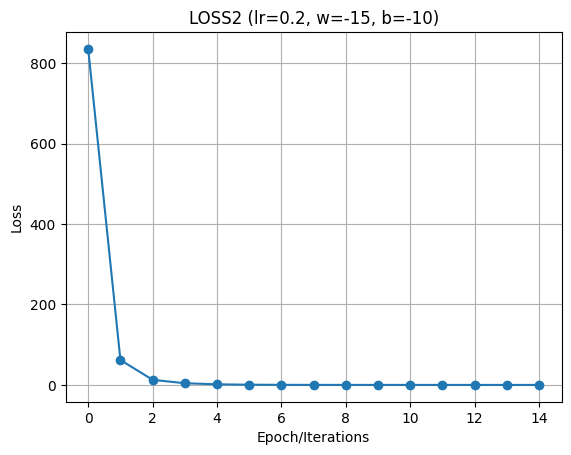

In [19]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Generate data
X = torch.arange(-3, 3, 0.1).view(-1, 1)
Y = 1 * X - 1 + 0.1 * torch.randn(X.size())

# Initialize parameters as specified
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
lr = 0.2
LOSS2 = []

# Define model
def forward(x): return w * x + b

# Loss function
criterion = torch.nn.MSELoss()

# Optimizer with lr=0.2
optimizer = torch.optim.SGD([w, b], lr=lr)

# Training loop
def train_with_custom_params(iterations):
    for epoch in range(iterations):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        LOSS2.append(loss.item())
        print(f"Epoch {epoch+1}: w = {w.item():.4f}, b = {b.item():.4f}, loss = {loss.item():.4f}")

# Train and plot result
train_with_custom_params(15)

# Plot loss
plt.plot(LOSS2, marker='o')
plt.xlabel("Epoch/Iterations")
plt.ylabel("Loss")
plt.title("LOSS2 (lr=0.2, w=-15, b=-10)")
plt.grid(True)
plt.show()


Double-click <b>here</b> for the solution.
<!--
def my_train_model(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
my_train_model(15)
-->


Plot the <code>LOSS</code> and <code>LOSS2</code>


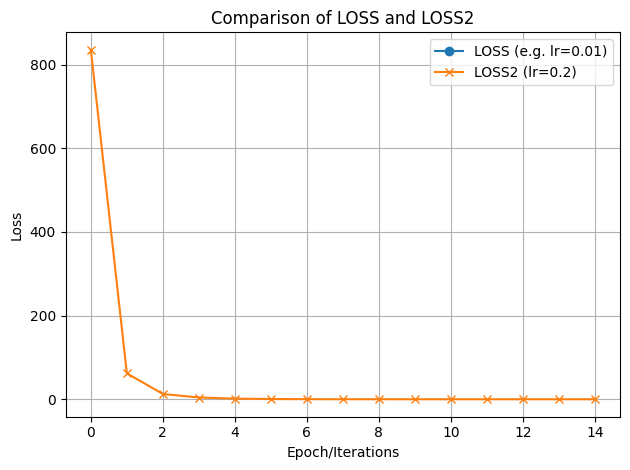

In [20]:
# Practice: Plot the LOSS and LOSS2 in order to compare the Total Loss

# Type your code here
import matplotlib.pyplot as plt

# Example LOSS lists (replace with actual if needed)
# LOSS = [0.9, 0.7, 0.5, 0.3, 0.2]
# LOSS2 = [1.0, 0.6, 0.35, 0.25, 0.2]

# Plot both LOSS and LOSS2
plt.plot(LOSS, label='LOSS (e.g. lr=0.01)', marker='o')
plt.plot(LOSS2, label='LOSS2 (lr=0.2)', marker='x')
plt.xlabel("Epoch/Iterations")
plt.ylabel("Loss")
plt.title("Comparison of LOSS and LOSS2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Double-click <b>here</b> for the solution.
<!--
plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()
-->



<a href="https://dataplatform.cloud.ibm.com/registration/stepone?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork&context=cpdaas&apps=data_science_experience%2Cwatson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"></a>


<!--Empty Space for separating topics-->


<h2>About the Authors:</h2>

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/">Mavis Zhou</a>


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |
-->


<hr>





## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
